In [8]:
pip install scikit-learn


     ---------------------------------------- 7.4/7.4 MB 4.5 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 38.6/38.6 MB 4.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
actions = [
    'ㄱ',
    'ㄴ',
    'ㄷ',
    'ㄹ',
    'ㅁ',
    'ㅂ',
    'ㅅ',
    'ㅇ',
    'ㅈ',
    'ㅊ',
    'ㅋ',
    'ㅌ',
    'ㅍ',
    'ㅎ',
    'ㅏ',
    'ㅑ',
    'ㅓ',
    'ㅕ',
    'ㅗ',
    'ㅛ',
    'ㅜ',
    'ㅠ',
    'ㅡ',
    'ㅣ',
    'ㅐ',
    'ㅒ',
    'ㅔ',
    'ㅖ',
    'ㅢ',
    'ㅚ',
    'ㅟ',
]

data = np.concatenate([
    np.load('dataset/seq_ㄱ_1659750423.npy'),
    np.load('dataset/seq_ㄴ_1659750423.npy'),
    np.load('dataset/seq_ㄷ_1659750423.npy'),
    np.load('dataset/seq_ㄹ_1659750423.npy'),
    np.load('dataset/seq_ㅁ_1659750423.npy'),
    np.load('dataset/seq_ㅂ_1659750423.npy'),
    np.load('dataset/seq_ㅅ_1659750423.npy'),
    np.load('dataset/seq_ㅇ_1659750423.npy'),
    np.load('dataset/seq_ㅈ_1659750423.npy'),
    np.load('dataset/seq_ㅊ_1659750423.npy'),
    np.load('dataset/seq_ㅋ_1659750423.npy'),
    np.load('dataset/seq_ㅌ_1659750423.npy'),
    np.load('dataset/seq_ㅍ_1659750423.npy'),
    np.load('dataset/seq_ㅎ_1659750423.npy'),
    np.load('dataset/seq_ㅏ_1659750423.npy'),
    np.load('dataset/seq_ㅑ_1659750423.npy'),
    np.load('dataset/seq_ㅓ_1659750423.npy'),
    np.load('dataset/seq_ㅕ_1659750423.npy'),
    np.load('dataset/seq_ㅗ_1659750423.npy'),
    np.load('dataset/seq_ㅛ_1659750423.npy'),
    np.load('dataset/seq_ㅜ_1659750423.npy'),
    np.load('dataset/seq_ㅠ_1659750423.npy'),
    np.load('dataset/seq_ㅡ_1659750423.npy'),
    np.load('dataset/seq_ㅣ_1659750423.npy'),
    np.load('dataset/seq_ㅐ_1659750423.npy'),
    np.load('dataset/seq_ㅒ_1659750423.npy'),
    np.load('dataset/seq_ㅔ_1659750423.npy'),
    np.load('dataset/seq_ㅖ_1659750423.npy'),
    np.load('dataset/seq_ㅢ_1659750423.npy'),
    np.load('dataset/seq_ㅚ_1659750423.npy'),
    np.load('dataset/seq_ㅟ_1659750423.npy'),
], axis=0)

data.shape

(7579, 30, 100)

In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(7579, 30, 99)
(7579,)


In [5]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(7579, 31)

In [6]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(6821, 30, 99) (6821, 31)
(758, 30, 99) (758, 31)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                41984     
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 31)                2015      
                                                                 
Total params: 60,575
Trainable params: 60,575
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/50
212/214 [============================>.] - ETA: 0s - loss: 35.4916 - acc: 0.1089
Epoch 1: val_acc improved from -inf to 0.10290, saving model to models\model.h5
214/214 [==============================] - 11s 31ms/step - loss: 35.3161 - acc: 0.1089 - val_loss: 3.1490 - val_acc: 0.1029 - lr: 0.0010
Epoch 2/50
213/214 [============================>.] - ETA: 0s - loss: 3.0599 - acc: 0.1310
Epoch 2: val_acc did not improve from 0.10290
214/214 [==============================] - 5s 25ms/step - loss: 3.0602 - acc: 0.1309 - val_loss: 3.1165 - val_acc: 0.1003 - lr: 0.0010
Epoch 3/50
212/214 [============================>.] - ETA: 0s - loss: 2.9446 - acc: 0.1673
Epoch 3: val_acc improved from 0.10290 to 0.14776, saving model to models\model.h5
214/214 [==============================] - 6s 26ms/step - loss: 2.9459 - acc: 0.1667 - val_loss: 3.0524 - val_acc: 0.1478 - lr: 0.0010
Epoch 4/50
214/214 [==============================] - ETA: 0s - loss: 3.0472 - acc: 0.1492
Epoch 4: val_acc im

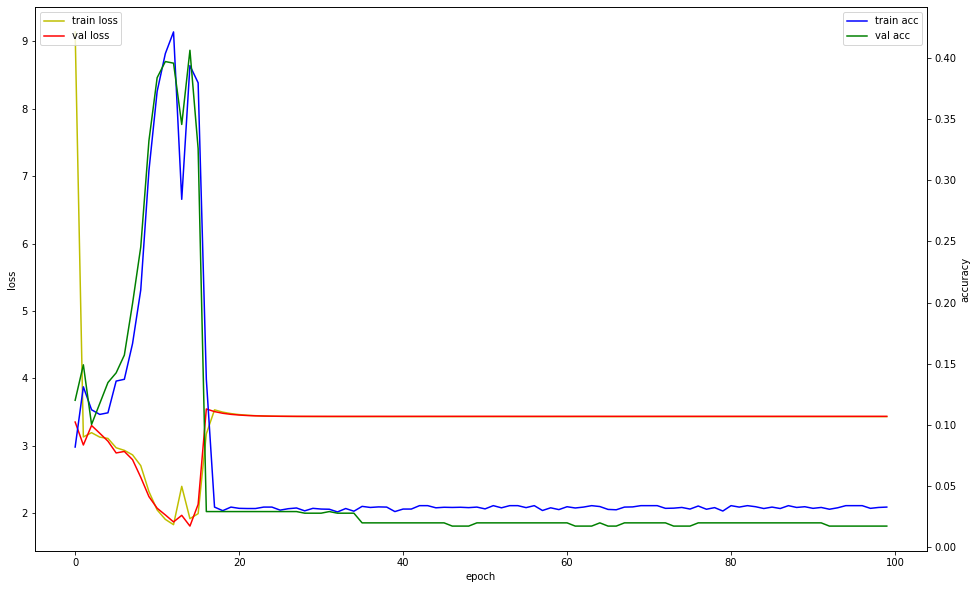

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

24/24 [==============================] - 1s 14ms/step


array([[[732,   0],
        [ 26,   0]],

       [[718,  10],
        [ 23,   7]],

       [[718,  18],
        [  8,  14]],

       [[730,   0],
        [  4,  24]],

       [[701,  29],
        [ 18,  10]],

       [[731,   3],
        [  0,  24]],

       [[722,  12],
        [  5,  19]],

       [[737,   1],
        [  0,  20]],

       [[730,   4],
        [ 16,   8]],

       [[734,   1],
        [  6,  17]],

       [[728,   7],
        [  9,  14]],

       [[737,   8],
        [  1,  12]],

       [[719,   4],
        [ 32,   3]],

       [[712,  21],
        [ 15,  10]],

       [[734,   0],
        [ 24,   0]],

       [[731,   1],
        [ 10,  16]],

       [[729,   0],
        [ 29,   0]],

       [[730,   2],
        [  1,  25]],

       [[730,   0],
        [ 28,   0]],

       [[729,   5],
        [  7,  17]],

       [[657,  78],
        [  0,  23]],

       [[736,   7],
        [  0,  15]],

       [[714,  15],
        [ 26,   3]],

       [[710,  22],
        [ 21, 